In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score,  f1_score

### Reading the data

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [4]:
# dropping the index column
df.drop(columns=["Unnamed: 0"], inplace=True)

### splitting the data

In [5]:
columns = df.columns
X = df[columns[:-1]]
y = df[columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
# comment the next line if using GridsearchCV or cross_val_predict
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=1)


In [6]:
print([len(X_train), len(X_val), len(X_test)])

[552, 138, 173]


### Plotting the data

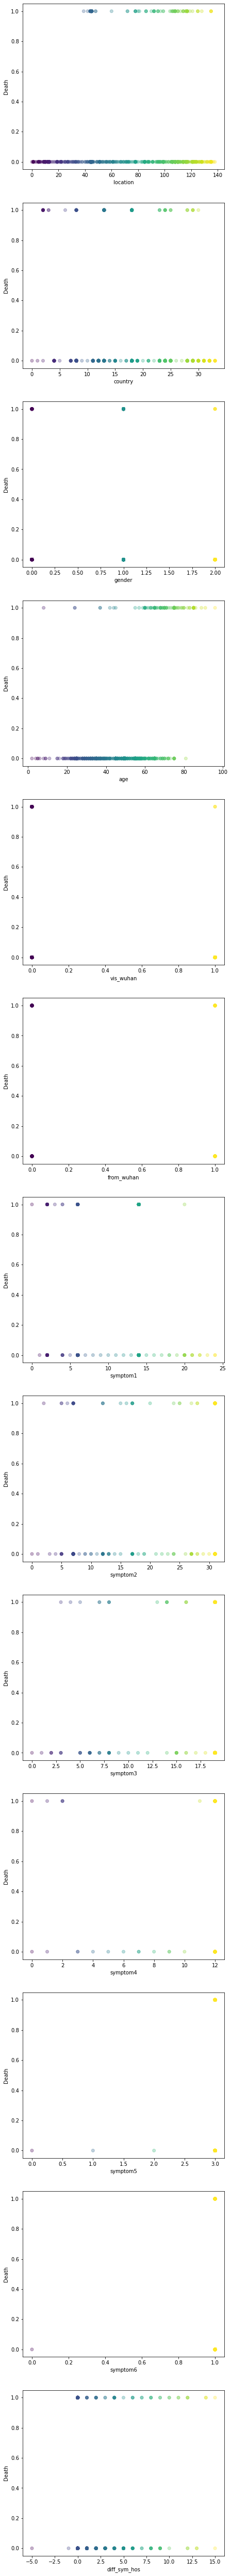

In [7]:
fig, axes = plt.subplots(nrows= 13, figsize = (7,91))
for i in range(len(X.columns)):
    axes[i].scatter(X[columns[i]], y, c = X[columns[i]], alpha = 0.3);
    axes[i].set_xlabel(f"{columns[i]}");
    axes[i].set_ylabel("Death");
    

### KNN

In [8]:
# GridSearchCV
# Training set contains the validation se (cross validation)
n_neighbors = np.arange(1,20)
param_grid = {"n_neighbors" : n_neighbors}
knn_hyperparam = GridSearchCV(estimator=KNeighborsClassifier(), scoring='recall', param_grid=param_grid, cv = 50)
knn_hyperparam.fit(X_train, y_train)
print(knn_hyperparam.best_params_)
# y_predict = knn_hyperparam.predict(y_val)


{'n_neighbors': 3}


In [9]:
# corss_val_predict
# Training set contains the validation se (cross validation)
# measuring the accuracy and the f_1 score for different valeus of k
accs = []
f_1s = []
k_range = np.arange(1,20)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_train, y_train, cv = 10)
    accs.append(accuracy_score(y_train, y_pred))
    f_1s.append(f1_score(y_train, y_pred))

In [10]:
# Manual
# validation set is a separated set
# measuring the accuracy and the f_1 score for different valeus of k
accs = []
f_1s = []
k_range = np.arange(1,20)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accs.append(accuracy_score(y_val, y_pred))
    f_1s.append(f1_score(y_val, y_pred))

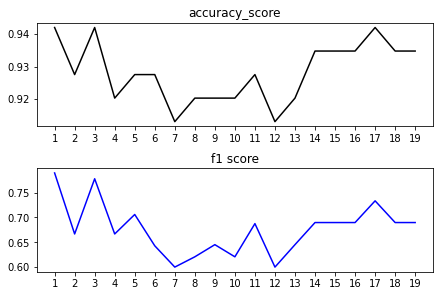

In [11]:
# plotting them to get the get the best value
fig, axes = plt.subplots(2, constrained_layout=True)
plt.setp(axes, xticks = k_range)

axes[0].plot(k_range, accs, c="k")
axes[0].set_title("accuracy_score")

axes[1].plot(k_range, f_1s, c="b")
axes[1].set_title("f1 score");


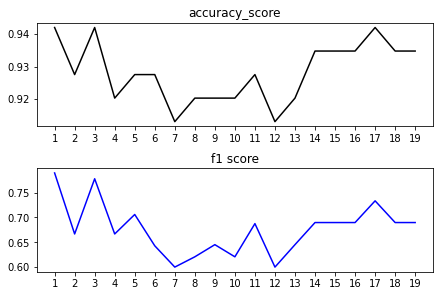

In [12]:
# plotting them to get the get the best value
fig, axes = plt.subplots(2, constrained_layout=True)
plt.setp(axes, xticks = k_range)

axes[0].plot(k_range, accs, c="k")
axes[0].set_title("accuracy_score")

axes[1].plot(k_range, f_1s, c="b")
axes[1].set_title("f1 score");


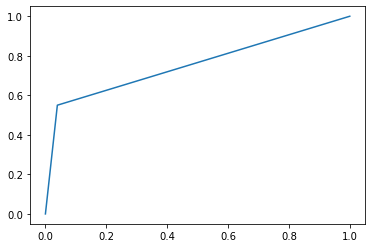

In [13]:
# from the previosu plot, it seems 3 is the optimal number for the number of neighbors
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr);

In [14]:
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[147   6]
 [  9  11]]
0.6470588235294118
0.55
0.5945945945945946
0.7553921568627451


# logistic regression

## import the additional required modules for logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## use GridSearchCV to tune the hyper parameters

### Note
-  we used the scoring method (i.e. goal) of the gridsearch to be "recall" since this is a medical application and we are very keen on spotting the +ve class (have covid)

In [16]:

solvers = ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=grid, n_jobs=-1, cv=10, scoring='recall',error_score=0)
grid_search.fit(X_train,y_train)
print("best parameters for the model are: ")
print(grid_search.best_params_)

best parameters for the model are: 
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


## train the model with the best parameters chosen by gridsearch

- we gave weight to the +ve classe to emphasize on it's importance since this is a medical application

In [17]:
# Create a logistic regression model and train it 
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=0.1,solver='newton-cg',max_iter=1000,class_weight='balanced'))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


## plotting the Roc curve of the trained model

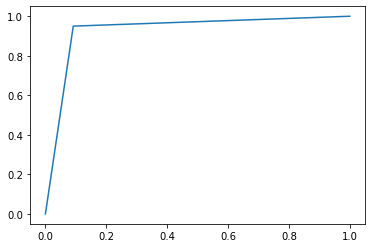

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr);

## using different scoring methods to evaluate the error in the test set

In [19]:
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[139  14]
 [  1  19]]
0.5757575757575758
0.95
0.7169811320754716
0.9292483660130718


# svm classifier 

## importing required packages for svm 

In [20]:
from sklearn.svm import SVC


## use GridSearchCV to tune the hyper parameters

### The hyperparameters of SVM classifier 
- C: Regularization parameter.The strength of the regularization is inversely    proportional to C
- kernel: usually used for creating some features out of the existing features to transform it to another dimension where it is easy to classify 
- class weight: since this is a medical application we might give some weight to the +ve class 

we used the scoring method (i.e. goal) of the gridsearch to be "recall" since this is a medical application and we are very keen on spotting the +ve class (have covid)

In [49]:
kernel = ['linear','poly','rbf','sigmoid']
c_values = [100, 10, 1.0, 0.1, 0.01]
gamma = ['scale','auto']
grid = dict(kernel=kernel,gamma=gamma,C=c_values)
grid_search = GridSearchCV(estimator=SVC(), param_grid=grid, n_jobs=-1, cv=10, scoring='balanced_accuracy',error_score=0)
grid_search.fit(X_train,y_train)
print("best parameters for the model are: ")
print(grid_search.best_params_)

best parameters for the model are: 
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


## train the model with the best parameters chosen by gridsearch

- we gave weight to the +ve classe to emphasize on it's importance since this is a medical application

In [59]:
model = SVC(C=1000,gamma='scale',kernel='rbf',class_weight='balanced')
model.fit(X_train, y_train)

SVC(C=1000, class_weight='balanced')

## predict on the test data

In [60]:
y_pred = model.predict(X_test)

## plotting the Roc curve of the trained model

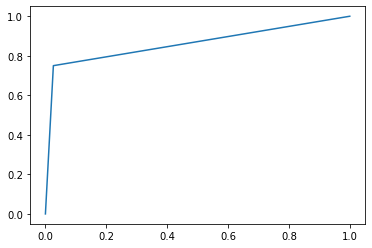

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr);

## using different scoring methods to evaluate the error in the test set

In [62]:
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[149   4]
 [  5  15]]
0.7894736842105263
0.75
0.7692307692307692
0.8619281045751633
